**Importation des bibliothèques**

In [ ]:
import pandas as pd  # Pour la manipulation des données
import numpy as np  # Pour les opérations numériques
from sklearn import preprocessing  # Pour le prétraitement des données
from sklearn.model_selection import train_test_split  # Pour diviser les données en ensembles d'entraînement et de test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Pour l'évaluation du modèle

**Chargement des données**

In [ ]:
data = pd.read_csv("/content/titanic.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isna().sum() #verfier les valeurs nulls

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#pour vérifier s'il ya des valeurs dupliquées
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:

# Supprimer les lignes avec des valeurs manquantes
data = data.dropna()

In [ ]:
data.isna().sum() #verfier les valeurs nulls de nouveau

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Visualisation des Données afin de comprendre les relations entre les paramètres**

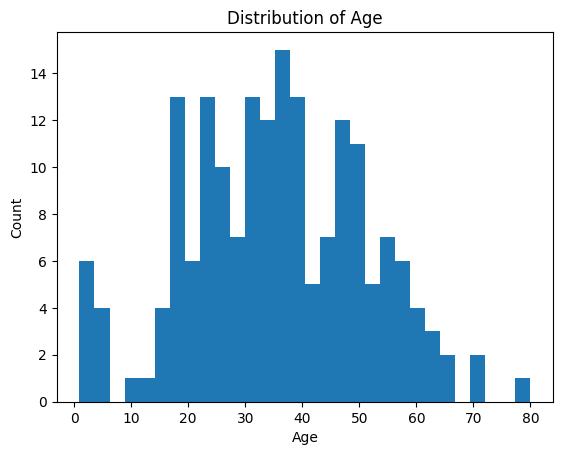

In [ ]:
import matplotlib.pyplot as plt

# Afficher un histogramme de la variable 'Age'
plt.hist(data['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

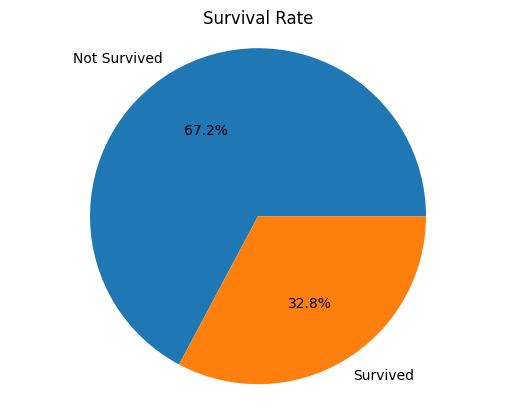

In [ ]:
# Compter le nombre de survivants et de non-survivants
survived_counts = data['Survived'].value_counts()

# Afficher un diagramme circulaire
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
plt.title('Survival Rate')
plt.axis('equal')
plt.show()

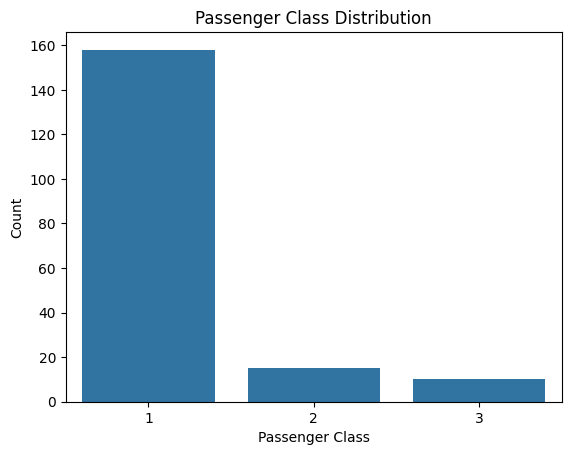

In [ ]:
import seaborn as sns

# Compter le nombre de passagers par classe
passenger_counts = data['Pclass'].value_counts()

# Afficher un diagramme en barres
sns.barplot(x=passenger_counts.index, y=passenger_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')
plt.show()

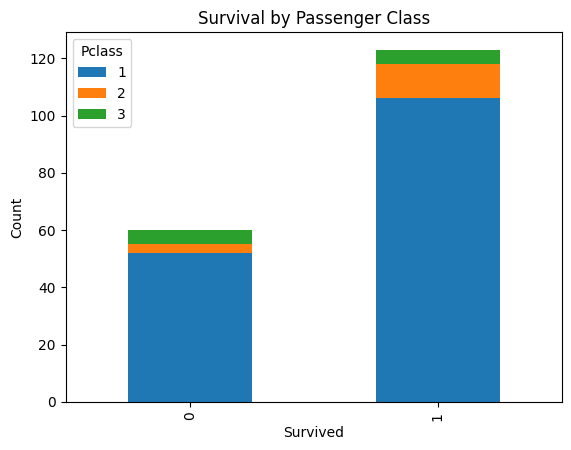

In [ ]:
import seaborn as sns

# Créer une table croisée entre Survived et Pclass
survived_pclass = pd.crosstab(data['Survived'], data['Pclass'])

# Afficher un diagramme en barres empilées
survived_pclass.plot(kind='bar', stacked=True)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Passenger Class')
plt.legend(title='Pclass')
plt.show()

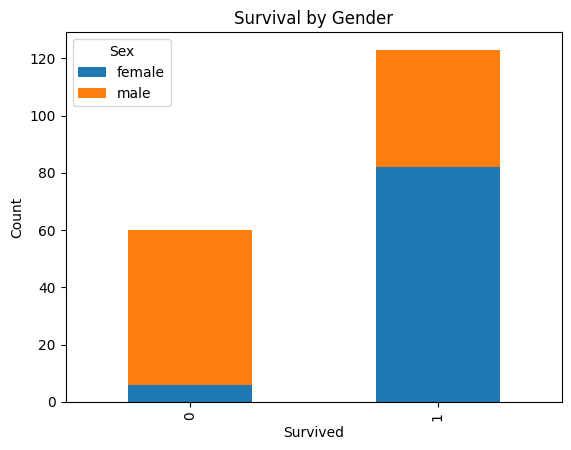

In [ ]:
import seaborn as sns

survived_sex = pd.crosstab(data['Survived'], data['Sex'])

survived_sex.plot(kind='bar', stacked=True)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.legend(title='Sex')
plt.show()

In [ ]:

# Supprimer les colonnes inutiles
colonnes_inutiles = ["PassengerId", "Name", "Ticket", "Cabin"]
data = data.drop(colonnes_inutiles, axis=1)

# Afficher le DataFrame résultant
print(data.head())

    Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
1          1       1  female  38.0      1      0  71.2833        C
3          1       1  female  35.0      1      0  53.1000        S
6          0       1    male  54.0      0      0  51.8625        S
10         1       3  female   4.0      1      1  16.7000        S
11         1       1  female  58.0      0      0  26.5500        S


In [ ]:
# Encodage binaire pour la colonne "Sex"
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Encodage one-hot pour la colonne "Embarked"
embarked_encoded = pd.get_dummies(data['Embarked'], prefix='Embarked')
data = pd.concat([data, embarked_encoded], axis=1)
data = data.drop('Embarked', axis=1)

# Afficher le DataFrame résultant
print(data.head())

    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
1          1       1    1  38.0      1      0  71.2833           1   
3          1       1    1  35.0      1      0  53.1000           0   
6          0       1    0  54.0      0      0  51.8625           0   
10         1       3    1   4.0      1      1  16.7000           0   
11         1       1    1  58.0      0      0  26.5500           0   

    Embarked_Q  Embarked_S  
1            0           0  
3            0           1  
6            0           1  
10           0           1  
11           0           1  


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Séparer les fonctionnalités (features) et la variable cible (target)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de forêt aléatoire
random_forest = RandomForestClassifier()

# Entraîner la forêt aléatoire sur les données d'entraînement
random_forest.fit(X_train, y_train)

# Effectuer des prédictions sur les données de test
y_pred = random_forest.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Précision du modèle : 70.27%


**réseaux des neuronnes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Séparer les fonctionnalités (features) et la variable cible (target)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle du réseau de neurones
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Effectuer des prédictions sur les données de test
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred_classes)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Epoch 1/10
5/5 [==============================] - 1s 4ms/step - loss: 0.9207 - accuracy: 0.6301
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.8203 - accuracy: 0.6781
Epoch 3/10
5/5 [==============================] - 0s 4ms/step - loss: 0.7512 - accuracy: 0.5890
Epoch 4/10
5/5 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.6986
Epoch 5/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.6233
Epoch 6/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.7397
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.6155 - accuracy: 0.6986
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.7260
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.7055
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Précision du modèle : 59.46%


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Séparer les fonctionnalités (features) et la variable cible (target)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet d'arbre de décision
decision_tree = DecisionTreeClassifier()

# Entraîner l'arbre de décision sur les données d'entraînement
decision_tree.fit(X_train, y_train)

# Effectuer des prédictions sur les données de test
y_pred = decision_tree.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))



Précision du modèle : 75.68%


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Séparer les fonctionnalités (features) et la variable cible (target)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet de régression logistique
logreg = LogisticRegression()

# Entraîner la régression logistique sur les données d'entraînement
logreg.fit(X_train, y_train)

# Effectuer des prédictions sur les données de test
y_pred = logreg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

Précision du modèle : 75.68%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
